In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.ar_model import  AutoReg, ar_select_order
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import  ARIMA
from sklearn.metrics import mean_squared_error
#from pmdarima.arima import auto_arima

import warnings
warnings.filterwarnings('ignore')

# set figure size to (14, 6)
plt.rcParams['figure.figsize'] = (14, 6)

In [50]:
temp_train = pd.read_csv('/home/damoon/damoon_spiced_academy/07_week/escad_data/temp_train.csv', parse_dates=True, index_col='date')
temp_train.drop(columns=['temp'], axis=1, inplace=True)
temp_train.rename(columns={'temp_c':'temp'},  inplace=True)
temp_1995_2000 = temp_train.loc['1995':'1999']

Text(0.5, 1.0, 'Temperature in C over the years 1995 to 2000')

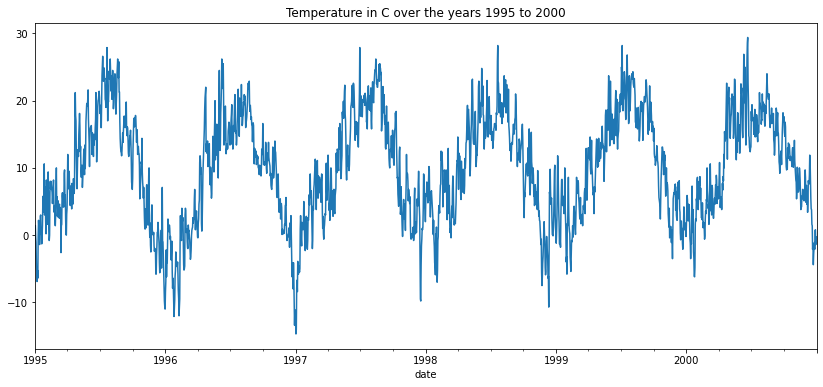

In [51]:
temp_train.mean()
temp_train['temp'].loc['1995':'2000'].plot()
plt.title('Temperature in C over the years 1995 to 2000')

Text(0.5, 1.0, 'Temperature in C in the years 1995 ')

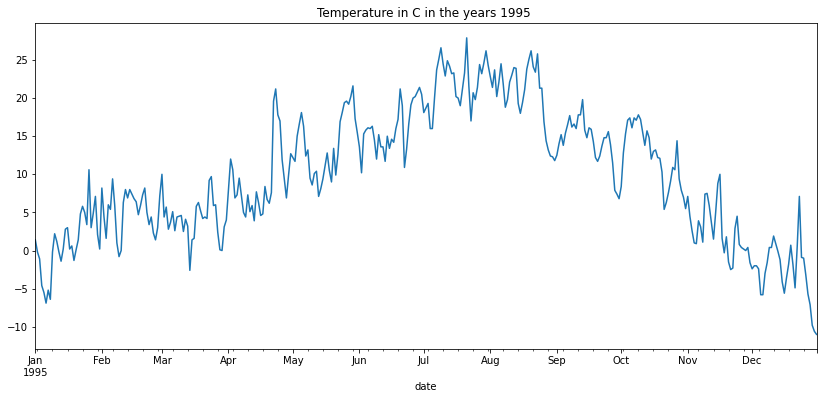

In [52]:
temp_train.mean()
temp_train['temp'].loc['1995'].plot()
plt.title('Temperature in C in the years 1995 ')

In [53]:
def print_adf(data):
    """
    Prints the results of the augmented Dickey Fuller Test
    """
    adf_stats, p, used_lag, n_obs, levels, information_criterion = adfuller(data)

    print(f""" 
              adf_stats: {adf_stats}
              p: {p} 
              used lag: {used_lag} 
              number of observations: {n_obs}

              CI 99%: {levels['1%']}
              CI 95%: {levels['5%']}
              CI 90%: {levels['10%']}
              information criterion (AIC): {information_criterion}
            """)


print_adf(temp_train['temp'])

 
              adf_stats: -12.266543948665667
              p: 8.833897809456729e-23 
              used lag: 48 
              number of observations: 25153

              CI 99%: -3.430610007453637
              CI 95%: -2.861654915453151
              CI 90%: -2.566831166130344
              information criterion (AIC): 112804.29907843753
            


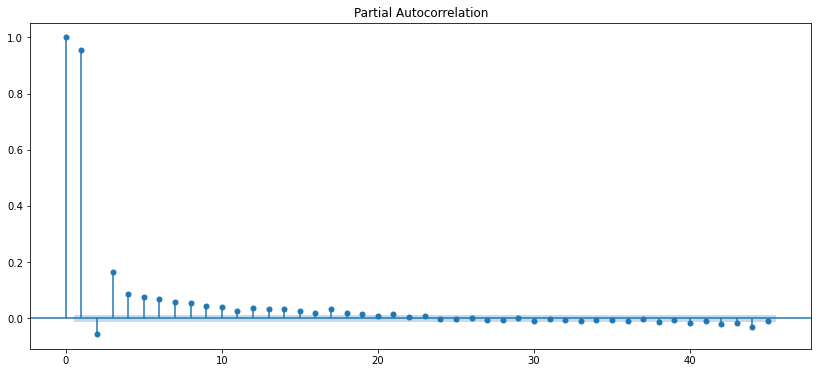

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


In [38]:
plot_pacf(temp_train['temp'])
plt.show()
order = ar_select_order(temp_train, maxlag=20, old_names=False)
order.ar_lags
print(order.ar_lags)

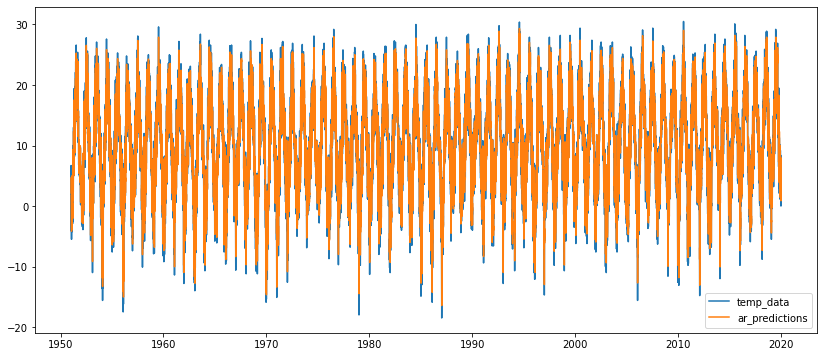

In [39]:
ar_model = AutoReg(temp_train['temp'], lags=17, old_names=False).fit()
#plot the prediction
plt.plot(temp_train['temp'], label = 'temp_data')
plt.plot(ar_model.predict(), label='ar_predictions')
plt.legend()
plt.show()

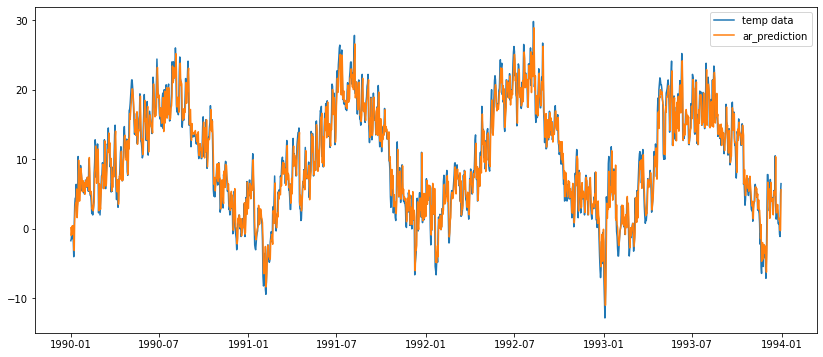

In [40]:
#plot in smaller scale
plt.plot(temp_train['temp'].loc['1990':'1993'], label='temp data')
plt.plot(ar_model.predict().loc['1990':'1993'], label='ar_prediction')
plt.legend()
plt.show()

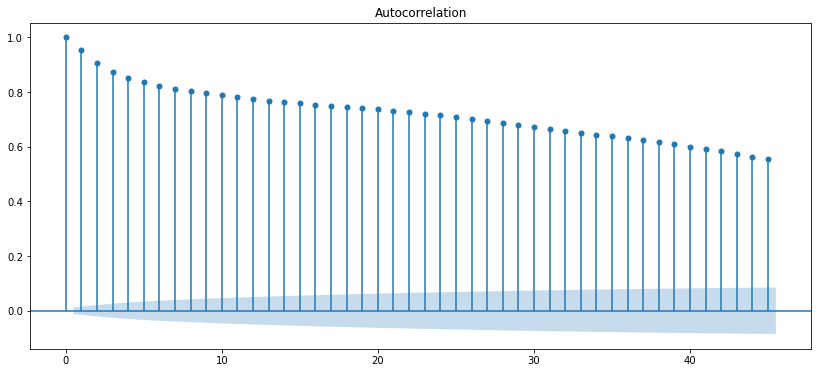

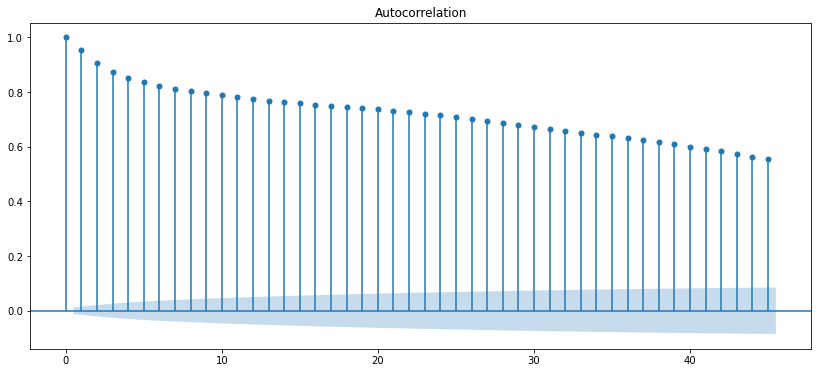

In [30]:
plot_acf(temp_train['temp'])

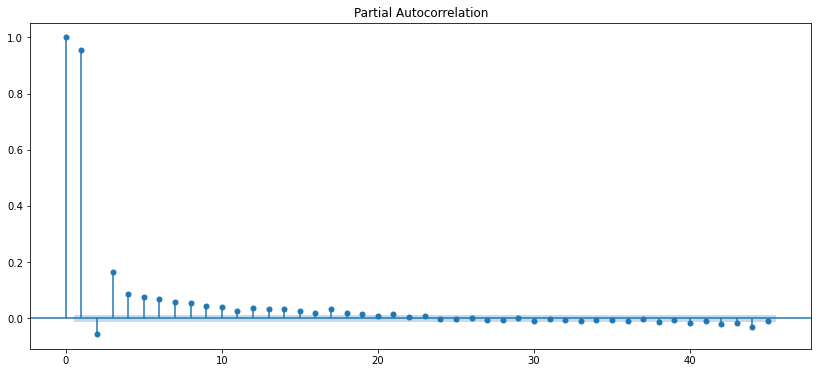

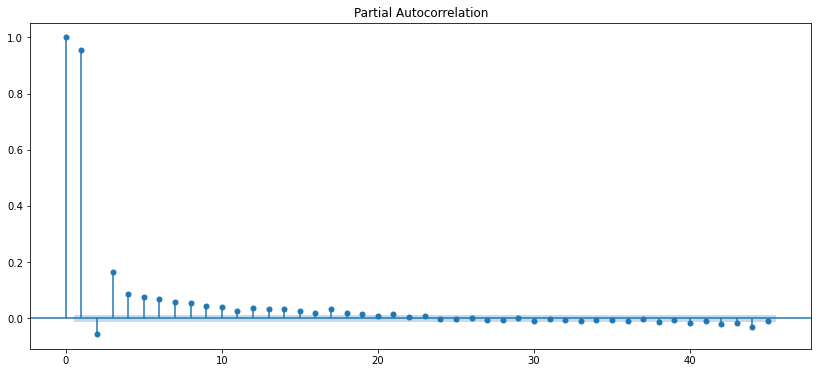

In [31]:
plot_pacf(temp_train['temp'])

In [ ]:
auto_arima_model = auto_arima(temp_train['temp'], start_p=0, start_q=0, max_p=15, max_q=15, max_d=2)

# ran on my pycharm IDE with python version 3.8 and the result was:
#auto_arima_model = auto_arima(temp_train['temp'], start_p=0, start_q=0, max_p=20, max_q=20, max_d=2)
#auto_arima_model
#ARIMA(order=(3, 1, 1), scoring_args={}, suppress_warnings=True, with_intercept=False)

In [41]:
model = ARIMA(temp_train['temp'], order=(3,1,1)).fit()

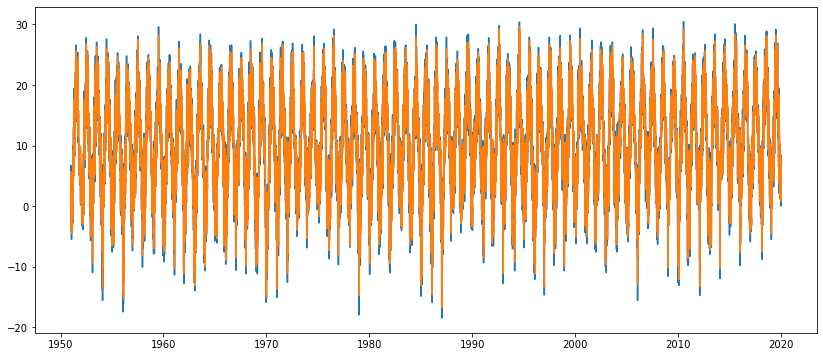

In [42]:
plt.plot(temp_train['temp'], label='temperature data')
plt.plot(model.predict(), label='arima_prediction')
plt.legend

plt.show()

In [43]:
seasonal_dummies = pd.get_dummies(temp_train.index.month, prefix='month', drop_first=True).set_index(temp_train.index)
temp_train = temp_train.join(seasonal_dummies)

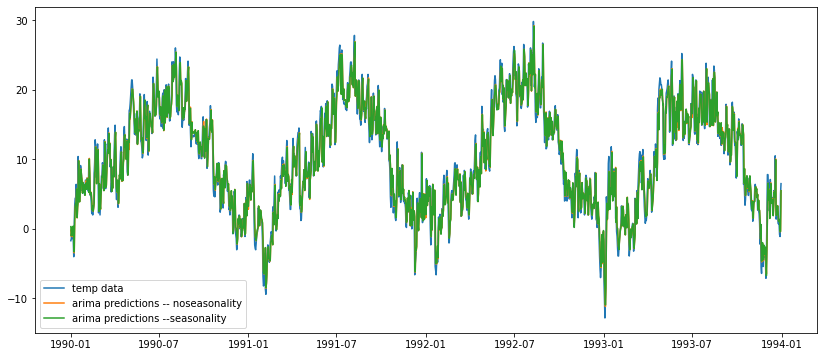

In [54]:
#exog in the model
model_seasonal = ARIMA(temp_train['temp'], order=(3,1,1), exog=seasonal_dummies).fit()

plt.plot(temp_train['temp'].loc['1990':'1993'], label='temp data')
plt.plot(model.predict().loc['1990':'1993'], label='arima predictions -- noseasonality')
plt.plot(model_seasonal.predict().loc['1990':'1993'], label='arima predictions --seasonality')
plt.legend()

plt.show()

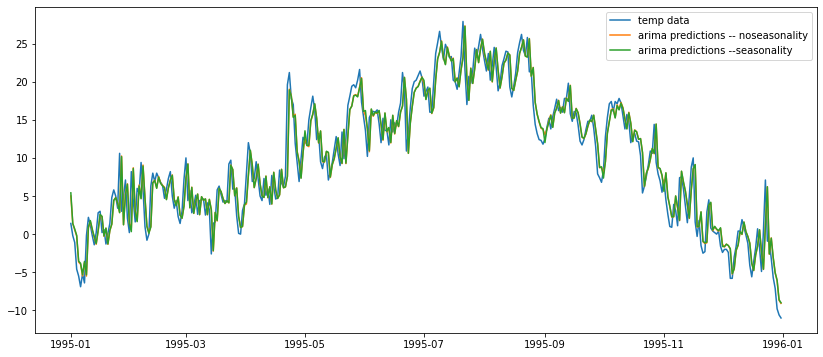

In [55]:
#plot for on year


plt.plot(temp_train['temp'].loc['1995'], label='temp data')
plt.plot(model.predict().loc['1995'], label='arima predictions -- noseasonality')
plt.plot(model_seasonal.predict().loc['1995'], label='arima predictions --seasonality')
plt.legend()

plt.show()

In [56]:
rmse_no_seasonality = np.sqrt(mean_squared_error(temp_train['temp'], model.predict()))
rmse_seasonality = np.sqrt(mean_squared_error(temp_train['temp'], model_seasonal.predict()))
print('remse_no_seasonality: ', rmse_no_seasonality)
print('\nrmse_seasonality: ', rmse_seasonality)

remse_no_seasonality:  2.2850424791866657

rmse_seasonality:  2.2817069396815755


In [46]:
print('prediciton of model witn no season for Jan 1st: ', model.forecast())
print('prediction  of model with seasonality for Jan 1st: ', model_seasonal.forecast(exog=seasonal_dummies.iloc[0]))

prediciton of model witn no season for Jan 1st:  2020-01-01    5.664689
Freq: D, dtype: float64
prediction  of model with seasonality for Jan 1st:  2020-01-01    6.130101
Freq: D, dtype: float64


In [57]:
# do the prediction on the test data
temp_test = pd.read_csv('/home/damoon/damoon_spiced_academy/07_week/escad_data/temp_test.csv', parse_dates=True, index_col='date')
temp_test.drop(columns=['temp'], axis=1, inplace=True)
temp_test.rename(columns={'temp_c':'temp'},  inplace=True)

In [58]:
# test dummies
seasonal_dummies_test = pd.get_dummies(temp_test.index.month, prefix='month', drop_first=True).set_index(temp_test.index)

In [59]:
temp_test['predictions'] = model.predict(start='2020-01-01', end='2020-12-31')
temp_test['predictions_seasonal'] = model_seasonal.predict(start='2020-01-01', end='2020-12-31', exog= seasonal_dummies_test)

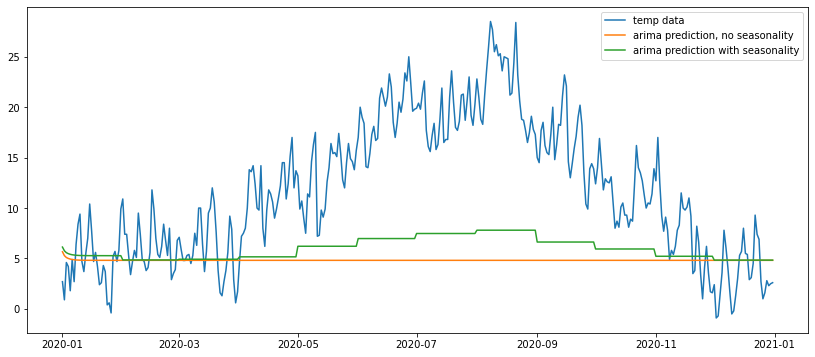

In [60]:
plt.plot(temp_test['temp'], label = 'temp data')
plt.plot(temp_test['predictions'], label = 'arima prediction, no seasonality')
plt.plot(temp_test['predictions_seasonal'], label = 'arima prediction with seasonality')
plt.legend()
plt.show()


In [61]:
rmse_no_seasonality = np.sqrt(mean_squared_error(temp_test['temp'], temp_test['predictions']))
rmse_seasonality = np.sqrt(mean_squared_error(temp_test['temp'], temp_test['predictions_seasonal']))
print('remse_no_seasonality: ', rmse_no_seasonality)
print('\nrmse_seasonality: ', rmse_seasonality)

remse_no_seasonality:  9.683822990679335

rmse_seasonality:  8.271058092895679
